# SaaS-Sales Data Analyst

# Latar belakang dan Rumusan masalah
## Latar Belakang
Software as a Service (SaaS) telah menjadi model bisnis dominan di era digital karena fleksibilitas dan skalabilitasnya. Perusahaan-perusahaan di berbagai industri mengandalkan layanan SaaS untuk operasional, marketing, dan keuangan. Namun, dalam praktiknya, kinerja penjualan SaaS sangat dipengaruhi oleh berbagai faktor seperti wilayah penjualan, segmen pasar, jenis produk, tingkat diskon, dan profitabilitas.
Dataset ini merekam transaksi SaaS secara global, mencakup data pelanggan, wilayah geografis, industri, produk, jumlah penjualan, diskon, dan keuntungan. Data ini sangat penting untuk menganalisis pola penjualan dan membantu pengambilan keputusan strategis.

## Rumusan Masalah
Berdasarkan latar belakang tersebut, maka rumusan masalah yang dapat diajukan antara lain:

1. Wilayah dan Distribusi
    1. Bagaimana distribusi penjualan produk SaaS di berbagai Region dan Sub-Region?
    2. Apakah negara dengan jumlah pelanggan terbanyak juga mencatatkan penjualan tertinggi?
2. Seberapa kuat hubungan antara nilai penjualan (Sales) dan profit dalam setiap transaksi?
3. Seberapa besar pengaruh diskon terhadap profit yang dihasilkan dari setiap transaksi?
4. Segmen pasar mana yang mencatatkan profit tertinggi untuk masing-masing industri?
5. Apakah terdapat tren musiman atau periode waktu tertentu (Pertahun) di mana penjualan SaaS meningkat secara signifikan?

## Tujuan
Tujuan dari analisis ini adalah untuk mengidentifikasi faktor-faktor utama yang memengaruhi performa penjualan dan profit produk SaaS, sehingga perusahaan dapat merancang strategi penjualan, pemasaran, dan diskon yang lebih efektif berdasarkan wilayah, segmen pasar, dan tren waktu.

## Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Datset
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [4]:
# Urutkan data berdasarkan kolom Sales dari besar ke kecil untuk memastikan sales dengan jumlah diatas $20.000 ada
df_sorted = df.sort_values(by='Sales', ascending=False)
df_sorted.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
6826,6827,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,8154,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
2623,2624,EMEA-2023-127180,10/23/2023,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888
4190,4191,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856


****Keterangan Kolom :****

1. Row ID : Nomor urut setiap baris data
2. Order ID : ID unik untuk setiap pesanan 
3. Order Date : Tanggal saat pesanan dilakukan atau dikonfirmasi
4. Date Key	 : Tanggal saat pemesanan tapi tidak menggunakan format date
5. Contact Name	: Nama contact orang yang dapat dihubungi
6. Country : Asal negara pemesanan
7. City : Asal kota pemesanan
8. Region : Nama benua
9. SubRegion : Wilayah lebih spesifik di dalam Region, seperti “Southeast Asia”, “Western Europe”, dan lainnya
10. Customer : Nama perusahaan atau individu yang melakukan pemesanan
11. Customer ID : ID unik pelanggan
12. Industry : Bidang dari perusahaan atau individu yang melakukan pemesanan
13. Segment : Kategori pelanggan berdasarkan tipe atau ukuran, seperti “Small Business”, “Enterprise”, atau “Consumer”
14. Product : Nama produk yang di pesan
15. License : Kode lisensi dari produk yang di pesan
16. Sales : Harga produk persatuan
17. Quantity : Jumlah Produk yang dipesan
18. Discount : Jumlah diskon yang di berakan untuk pemesanan
19. Profit : Profit yang didapat dalam sekali penjualan


In [5]:
df_region = df['Region'].unique()
df_region   

array(['EMEA', 'AMER', 'APJ'], dtype=object)

EMEA : Europe, Middle East, and Africa

AMER : Americas

APJ : Asia Pacific and Japan

In [6]:
df_subregion = df['Subregion'].unique()
df_subregion 

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

UKIR : United Kingdom & Ireland

EU : European Union / Western Europe (umum)

EU-WEST	: Western Europe (contoh: France, Germany)

EU-EAST	: Eastern Europe (contoh: Poland, Hungary)

NOR : Nordic countries (Sweden, Norway, Finland)

NAMER : North America (US & Canada)

LATAM : Latin America (Amerika Selatan & Tengah)

JAPN : Japan

IND : India

ANZ : Australia & New Zealand

APAC : Asia-Pacific secara umum (Asia Timur, Tenggara, Selatan, Oseania)

MEA : Middle East & Africa

In [7]:
df.shape

(9994, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [9]:
# Melihat deskripsi data (standar deviasi, mean, min, max, count, q1, q2, q3)
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# melihat deskripsi data berdasarkan kolom bertipe objek (count, unique, top, freq)
df.describe(include=object)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


## Data Cleaning

### Cek Missing Value

In [11]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Hasil pemeriksaan menunjukkan bahwa tidak ada satu pun kolom dalam dataset Anda yang mengandung nilai kosong atau missing values (NaN). Ini berarti bahwa setiap baris dalam dataset memiliki informasi lengkap di semua kolom yang tersedia.

### Cek duplicate

In [12]:
df_duplicate = df.duplicated().sum()
print(f'Jumlah data yang duplikat adalah {df_duplicate}')

df[df.duplicated(keep=False)]

Jumlah data yang duplikat adalah 0


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


### Cek Outlier

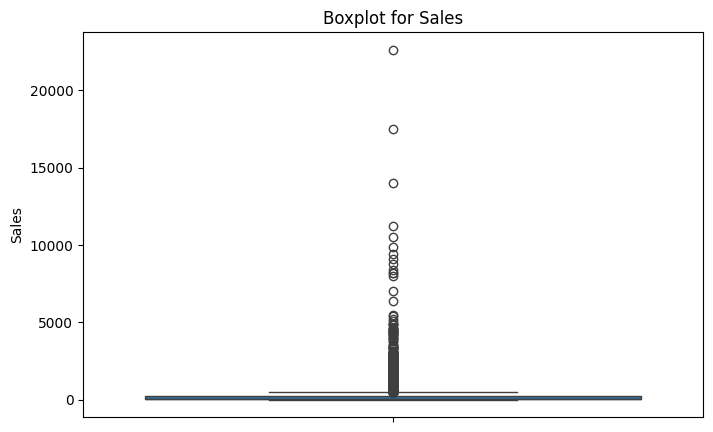

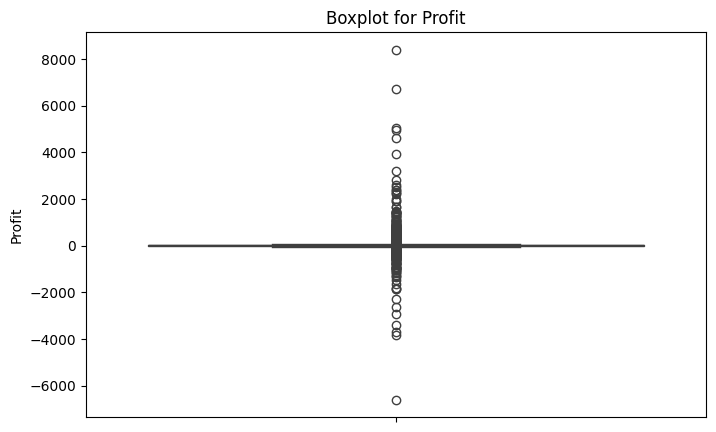

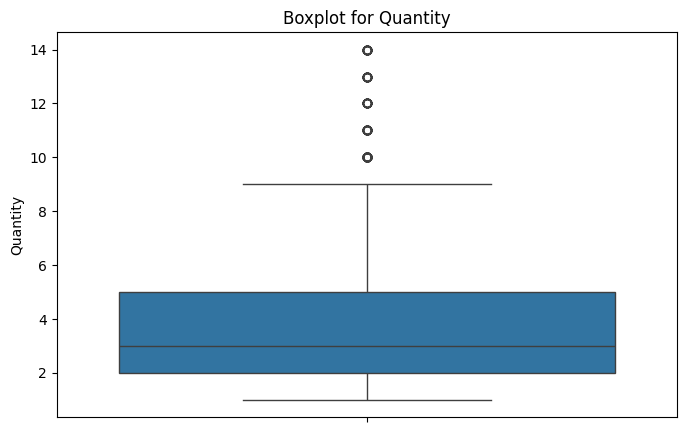

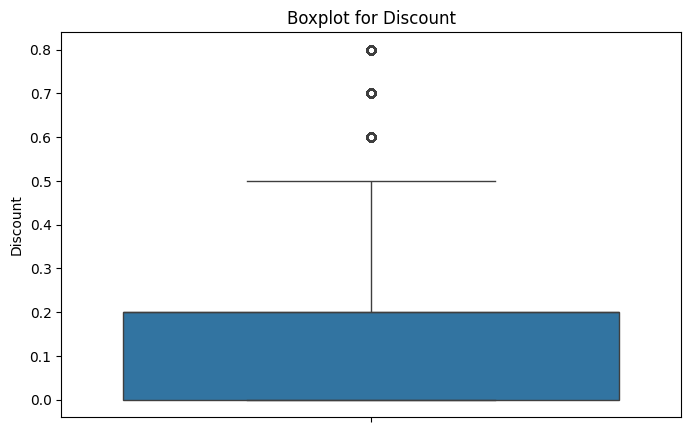

In [13]:
# Cek Outlier
for i, feature in enumerate(['Sales', 'Profit', 'Quantity', 'Discount']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [14]:
# Cek Persentase Outlier Sales dan Profit
# Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

percent_outliers = len(outliers) / len(df) * 100

print(f"Jumlah outlier Profit: {len(outliers)}")
print(f"Persentase outlier Profit: {percent_outliers:.2f}%")

# Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]


percent_outliers = len(outliers) / len(df) * 100

print(f"Jumlah outlier Sales: {len(outliers)}")
print(f"Persentase outlier Sales: {percent_outliers:.2f}%")


Jumlah outlier Profit: 1881
Persentase outlier Profit: 18.82%
Jumlah outlier Sales: 1167
Persentase outlier Sales: 11.68%


Dalam proses analisis data, keberadaan outlier dalam jumlah besar memang dapat memengaruhi interpretasi, terutama jika tidak ditangani dengan bijak. Berdasarkan deteksi menggunakan metode IQR (Interquartile Range), ditemukan bahwa:

Outlier pada kolom Profit mencapai sekitar 18.82% dari total data,

Outlier pada kolom Sales mencapai sekitar 11.68% dari keseluruhan transaksi.

Meskipun jumlahnya tergolong signifikan, outlier tidak dihapus dalam analisis ini. Hal ini dilakukan untuk menjaga keutuhan data asli dan mempertahankan potensi insight penting yang mungkin justru berasal dari nilai-nilai ekstrem tersebut. Dalam beberapa kasus, outlier bisa merepresentasikan transaksi besar, promo strategis, atau pelanggan utama, sehingga keberadaannya tetap relevan untuk dianalisis.

### Cek Karakter

In [15]:
# cek karakter
for col in df.select_dtypes(include='object'):
    if df[col].str.contains(r'[^\w\s\-.,\s{2,}^\s|\s$]', regex=True).any():
        print(f"Ada karakter aneh di kolom: {col}")

Ada karakter aneh di kolom: Order Date
Ada karakter aneh di kolom: Customer


In [16]:
# Melihat data yang mengandung karakter aneh pada kolom customer
mask = df['Customer'].astype(str).str.contains(r'[^\w\s\-,.]| {2,}|^\s|\s$', regex=True)

# Filter baris yang mengandung karakter aneh
weird_customers = df[mask]

# Tampilkan hasil (bisa juga disimpan ke file)
print("Daftar Customer dengan karakter khusus:\n")
print(weird_customers[['Customer']].drop_duplicates())

Daftar Customer dengan karakter khusus:

                    Customer
35          Procter & Gamble
151        Johnson & Johnson
160  J.P. Morgan Chase & Co.
186                     AT&T


In [17]:
# Menghapus titik diakhir string pada kolom customer
df['Customer'] = df['Customer'].str.replace(r'\.$', '', regex=True)

berdasarkan pemeriksaan, terdapat karakter khusus pada kolom `order date` dan `customer`. hal ini bukan merupakan masalah, karena:

- kolom `order date` menggunakan tanda `/` sebagai bagian dari format tanggal (misalnya: `01/02/2023`).
- kolom `customer` memuat simbol seperti `&` atau `.` yang merupakan bagian sah dari nama perusahaan (contohnya: `procter & gamble`, `j.p. morgan`).


In [18]:
# Ubah menjadi 2 angka dibelakang koma
df['Sales'] = df['Sales'].round(2)
df['Profit'] = df['Profit'].round(2)
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.00,41.91
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.00,219.58
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.00,6.87
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.58,5,0.45,-383.03
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.25,3,0.20,4.10
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.96,2,0.00,15.63
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.58,2,0.20,19.39
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.60,4,0.00,13.32


In [19]:
# menghapus Row ID dan Date KEY
df.drop(['Date Key', 'Row ID', 'Customer ID', 'License'], axis=1, inplace=True)
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.96,2,0.00,41.91
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.94,3,0.00,219.58
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.62,2,0.00,6.87
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.58,5,0.45,-383.03
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.25,3,0.20,4.10
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.96,2,0.00,15.63
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.58,2,0.20,19.39
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.60,4,0.00,13.32


Kolom `'Row ID'`, `'Date Key'`, `'Customer ID'`, dan `'License'` dihapus karena tidak memberikan informasi analitis yang relevan—`'Row ID'` hanya nomor urut teknis, `'Date Key'` redundan karena sudah ada `'Order Date'`, `'Customer ID'` bersifat identifikasi unik tanpa nilai analisis, dan `'License'` tidak menunjukkan variasi signifikan terhadap penjualan atau profit.


In [20]:
# Menambahkan kolom baru StatusDiscount
df['StatusDiscount'] = np.where(df['Discount'] > 0, 'Diskon', 'Tidak Diskon')
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,StatusDiscount
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.96,2,0.00,41.91,Tidak Diskon
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.94,3,0.00,219.58,Tidak Diskon
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.62,2,0.00,6.87,Tidak Diskon
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.58,5,0.45,-383.03,Diskon
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.37,2,0.20,2.52,Diskon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.25,3,0.20,4.10,Diskon
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.96,2,0.00,15.63,Tidak Diskon
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.58,2,0.20,19.39,Diskon
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.60,4,0.00,13.32,Tidak Diskon


In [21]:
# Ubah format tanggal menjadi YYYY-MM-DD
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,StatusDiscount
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.96,2,0.00,41.91,Tidak Diskon
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.94,3,0.00,219.58,Tidak Diskon
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.62,2,0.00,6.87,Tidak Diskon
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.58,5,0.45,-383.03,Diskon
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.37,2,0.20,2.52,Diskon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.25,3,0.20,4.10,Diskon
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.96,2,0.00,15.63,Tidak Diskon
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.58,2,0.20,19.39,Diskon
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.60,4,0.00,13.32,Tidak Diskon


Menambahkan kolom baru bernama StatusDiscount untuk mengklasifikasikan transaksi berdasarkan ada atau tidaknya diskon, sehingga mempermudah analisis pengaruh diskon terhadap profit.

In [22]:
# Ekspor data ke CSV
importData = df.to_csv('SaaS-Sales-Clean.csv', index=False)


## Analisa Data

### 1. Wilayah dan Distribusi Pasar

#### 1. Bagaimana distribusi penjualan produk SaaS di berbagai Region dan Sub-Region?

In [23]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_by_subregion = df.groupby("Subregion")["Sales"].sum().sort_values(ascending=False)
total_sales = df['Sales'].sum()
percentage_sales_by_region = (sales_by_region / total_sales) * 100
percentage_sales_by_subregion = (sales_by_subregion / total_sales) * 100
""
print("Total Sales:", total_sales.round(0))

print("Sales by Region:")
print(percentage_sales_by_region.round(2))

print("\nSales by Subregion:")
print(percentage_sales_by_subregion.round(2))

Total Sales: 2297201.0
Sales by Region:
Region
EMEA    45.44
AMER    36.47
APJ     18.09
Name: Sales, dtype: float64

Sales by Subregion:
Subregion
NAMER      25.96
EU-WEST    16.72
UKIR       15.13
LATAM      10.51
JAPN        7.41
NOR         5.54
APAC        4.65
ANZ         3.70
MEA         3.34
EU-EAST     3.31
IND         2.33
EU          1.40
Name: Sales, dtype: float64


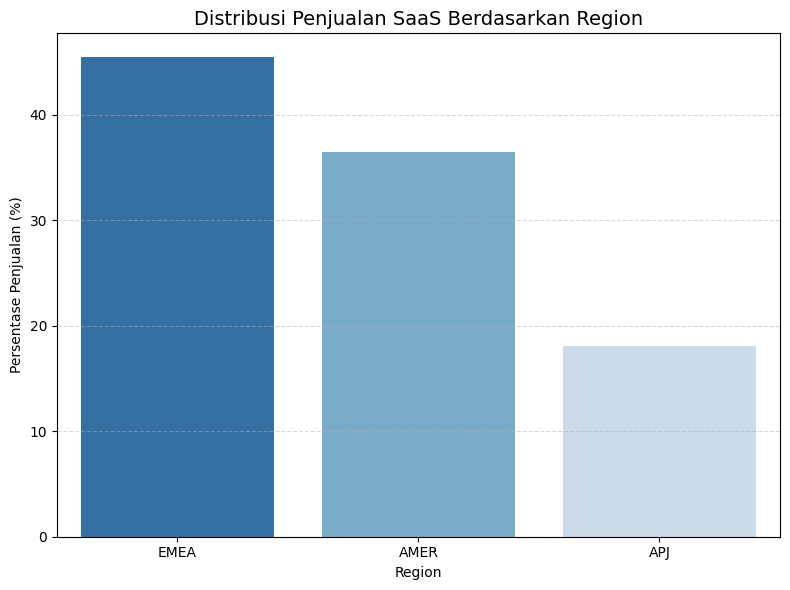

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot Penjualan per Region
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_sales_by_region.index, y=percentage_sales_by_region.values, palette="Blues_r")

plt.title("Distribusi Penjualan SaaS Berdasarkan Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Persentase Penjualan (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

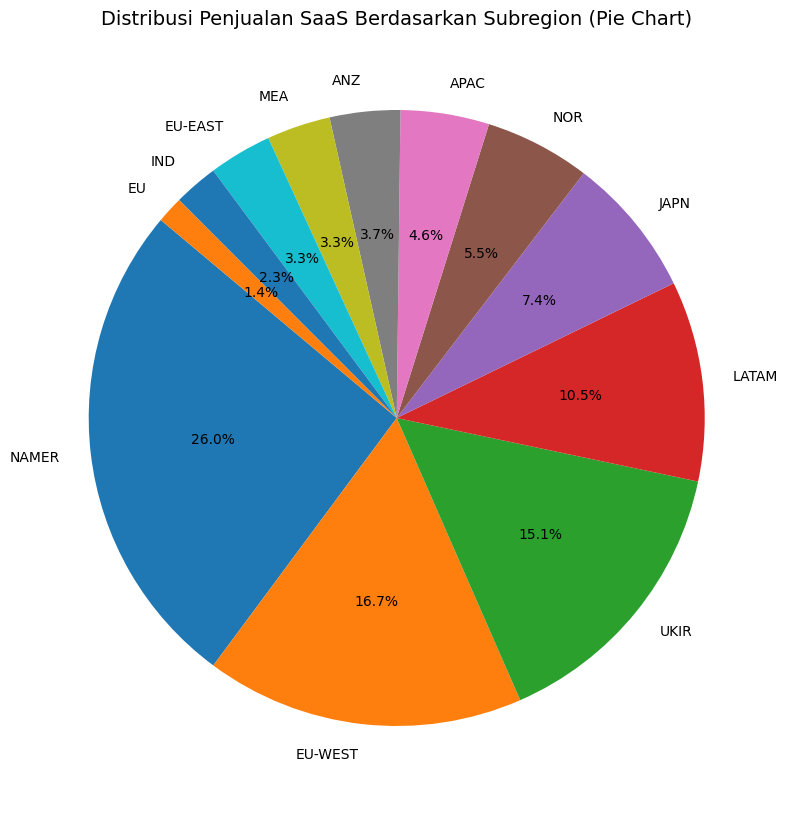

In [25]:
# Pie Chart Penjualan per Subregion
plt.figure(figsize=(10, 10))
plt.pie(
    percentage_sales_by_subregion.values,
    labels=percentage_sales_by_subregion.index,
    autopct='%1.1f%%',
    startangle=140,
)

plt.title("Distribusi Penjualan SaaS Berdasarkan Subregion (Pie Chart)", fontsize=14)
plt.show()

#### 2. Apakah negara dengan jumlah pelanggan terbanyak juga mencatatkan penjualan tertinggi?

In [122]:
# Gabungkan data jumlah customer dan total sales
join = df.groupby('Country').agg({
    'Customer': 'nunique',  # asumsi kolom customer
    'Sales': 'sum'
}).reset_index().rename(columns={'Customer': 'Customer'})

# Urutkan berdasarkan customer terbanyak
top_countries = join.sort_values('Customer', ascending=False).head(10)
top_countries

,Country,Customer,Sales
47,United States,99,457687.62
46,United Kingdom,99,313169.81
24,Japan,96,170187.91
1,Australia,95,80166.11
15,France,93,116511.98
26,Mexico,88,78258.19
5,Canada,86,138641.29
16,Germany,83,89473.68
41,Sweden,74,55603.07
4,Brazil,68,76269.61


Insight : 

Negara-negara dengan jumlah pelanggan terbanyak seperti **United States**, **United Kingdom**, dan **Japan** juga mencatatkan penjualan tertinggi secara global, memperkuat temuan bahwa **wilayah EMEA dan Americas—khususnya subregion NAMER—mendominasi kontribusi penjualan SaaS dunia**, dengan EMEA menyumbang 45.44% dan Americas 36.47% dari total penjualan.


### 2. Seberapa kuat hubungan antara nilai penjualan dan profit dalam setiap transaksi produk SaaS?

In [26]:
corelation = df[['Sales', 'Profit']].corr().loc['Sales', 'Profit']
print(f'Korelasi antara Sales dan Profit adalah {corelation.round(2)}')

Korelasi antara Sales dan Profit adalah 0.48


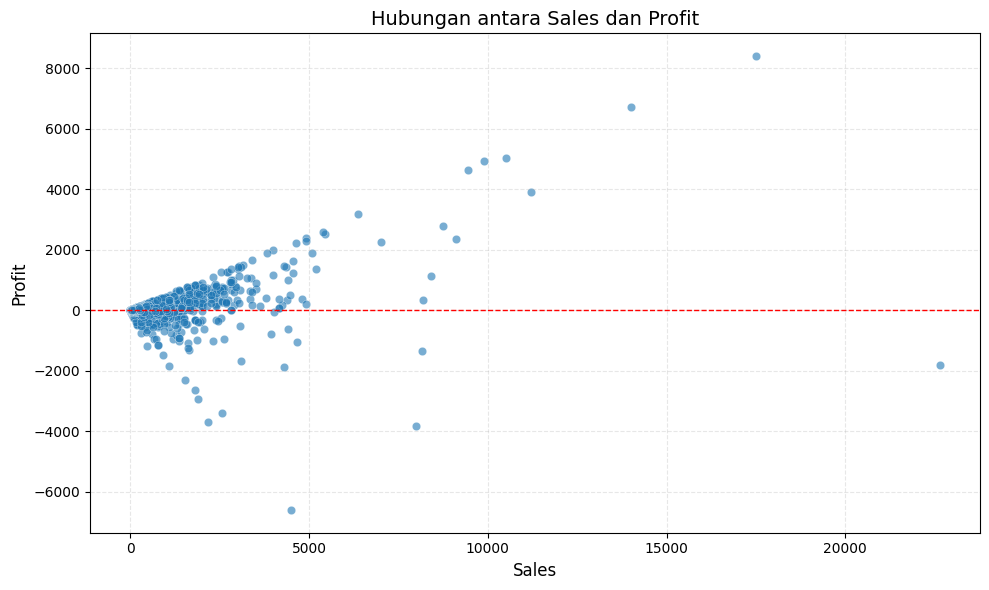

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Sales',
    y='Profit',
    alpha=0.6,
    edgecolor='w',
    linewidth=0.3
)

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Hubungan antara Sales dan Profit", fontsize=14)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Insight :

Nilai korelasi 0.48 menunjukkan bahwa Terdapat hubungan positif sedang antara Sales dan Profit. Artinya, saat penjualan (Sales) meningkat, profit cenderung ikut naik, dan hubungan ini cukup konsisten, meskipun tidak terlalu kuat.

### 3. Seberapa besar pengaruh diskon terhadap profit yang dihasilkan dari setiap transaksi?

In [ ]:
# Cek Normalitas
from scipy.stats import shapiro

for status in df['StatusDiscount'].unique():
    filterStatus = df[df['StatusDiscount'] == status]['Profit']
    stat, pvalue = shapiro(filterStatus)
    
    if pvalue < 0.05:
        print("Data berdistribusi tidak normal.\n")
    else:
        print("Data berdistribusi normal.\n")


Data berdistribusi tidak normal.

Data berdistribusi tidak normal.



In [29]:
from scipy.stats import mannwhitneyu

# Ambil masing-masing subset berdasarkan status diskon
diskon = df[df['StatusDiscount'] == 'Diskon']['Profit']
tidak_diskon = df[df['StatusDiscount'] == 'Tidak Diskon']['Profit']

# Uji Mann-Whitney U
stat, pvalue = mannwhitneyu(diskon, tidak_diskon, alternative='two-sided')

print(f"Statistik Uji: {stat:.2f}")
print(f"p-value: {pvalue:.4f}")

if pvalue < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Gagal menolak H0 → Tidak ada bukti cukup untuk menyatakan ada perbedaan signifikan.")

Statistik Uji: 6266986.50
p-value: 0.0000
Tolak H0 → Ada perbedaan signifikan antara dua kelompok.


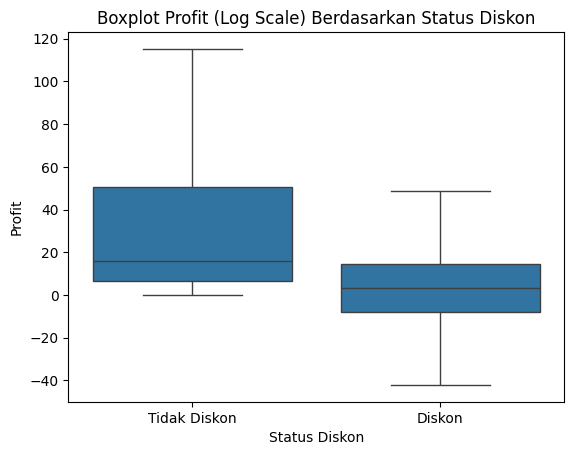

In [30]:
sns.boxplot(x='StatusDiscount', y='Profit', data=df, showfliers=False) # showfliers = False agar tidak menampilkan outlier
plt.title("Boxplot Profit (Log Scale) Berdasarkan Status Diskon")
plt.xlabel("Status Diskon")
plt.ylabel("Profit")
plt.show()

Insight : 

Terdapat perbedaan signifikan antara profit transaksi yang menggunakan diskon dan yang tidak (p-value < 0.001).
Transaksi tanpa diskon secara umum menghasilkan profit yang lebih tinggi, terlihat dari distribusi nilai profit yang lebih besar dan median yang lebih tinggi dibandingkan transaksi yang menggunakan diskon.

### 4. Segmen pasar mana yang mencatatkan profit tertinggi untuk masing-masing industri?

In [33]:
data = (
    df.groupby(['Industry', 'Segment'])['Profit']
    .sum()
    .reset_index()
    .sort_values(['Industry', 'Profit'], ascending=False)
)
dataFilter = data.groupby('Industry').head(3).reset_index(drop=True)
dataFilter

,Industry,Segment,Profit
0,Transportation,SMB,3868.00
1,Transportation,Enterprise,2085.20
2,Transportation,Strategic,1449.50
3,Tech,SMB,9656.21
4,Tech,Enterprise,8561.78
5,Tech,Strategic,6397.08
6,Retail,SMB,18576.16
7,Retail,Enterprise,7319.05
8,Retail,Strategic,4312.73
9,Misc,Enterprise,6076.46


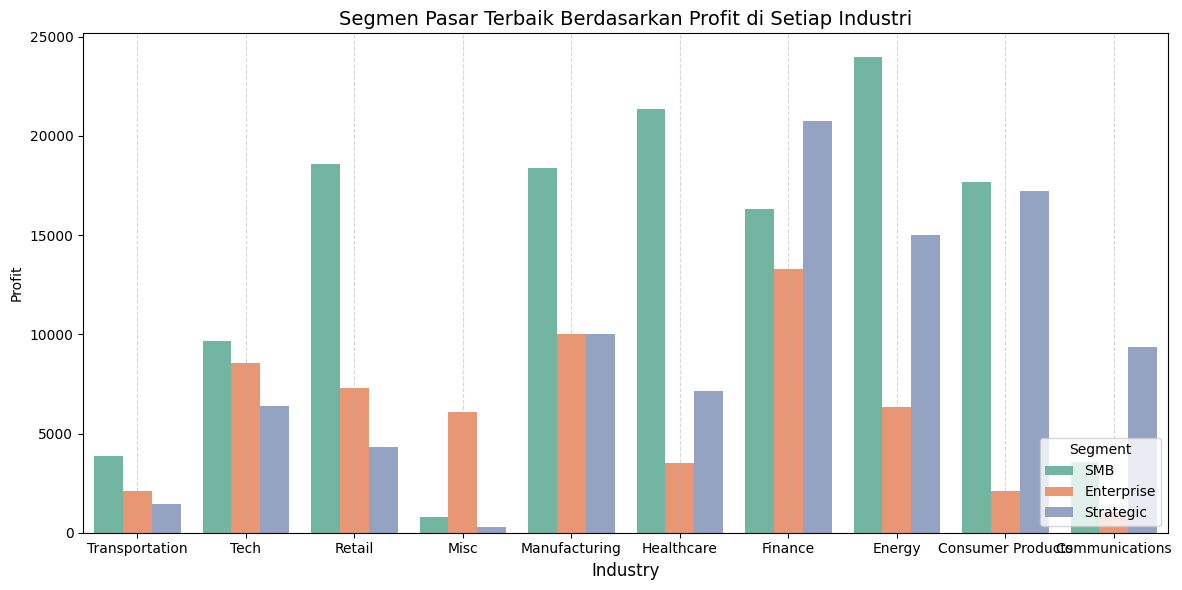

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dataFilter,
    x='Industry',
    y='Profit',
    hue='Segment',
    palette='Set2'
)

plt.title("Segmen Pasar Terbaik Berdasarkan Profit di Setiap Industri", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Profit")
plt.legend(title='Segment', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.show()

Insight : 

Segmen SMB mendominasi profit tertinggi di hampir semua industri, menunjukkan bahwa pasar UKM (Usaha Kecil dan Menengah) merupakan kontributor terbesar terhadap total profit. Industri dengan profit tertinggi secara keseluruhan adalah Energy - SMB ($23.971,63), Healthcare - SMB ($21.336,58), dan Finance - Strategic ($20.751,81). Hal ini menunjukkan bahwa sektor Energy, Healthcare, dan Finance memiliki daya beli tinggi serta potensi pasar yang besar di masing-masing segmennya.

### 5. Apakah terdapat tren musiman atau periode waktu tertentu (Pertahun) di mana penjualan SaaS meningkat secara signifikan?

In [35]:
from scipy.stats import kstest, zscore

df['Tahun'] = df['Order Date'].dt.year
sales_per_year = pd.concat([df[df['Tahun'] == tahun]['Sales'] for tahun in sorted(df['Tahun'].unique())])

z_sales = zscore(sales_per_year)

# Uji Kolmogorov–Smirnov terhadap distribusi normal
stat, pvalue = kstest(z_sales, 'norm')

if pvalue < 0.05:
        print("Data berdistribusi tidak normal.\n")
else:
    print("Data berdistribusi normal.\n")




Data berdistribusi tidak normal.



In [38]:
from scipy.stats import kruskal

# Uji Kruskal-Wallis
stat, pvalue = kruskal(*sales_per_year)

print("Hasil Uji Kruskal-Wallis:")
print(f"Statistik Uji: {stat:.2f}")
print(f"p-value: {pvalue:.4f}")

if pvalue < 0.05:
    print("Tolak H0 → Ada perbedaan signifikan antara dua kelompok.")
else:
    print("Gagal menolak H0 → Tidak ada bukti cukup untuk menyatakan ada perbedaan signifikan.")

Hasil Uji Kruskal-Wallis:
Statistik Uji: 9993.00
p-value: 0.4981
Gagal menolak H0 → Tidak ada bukti cukup untuk menyatakan ada perbedaan signifikan.


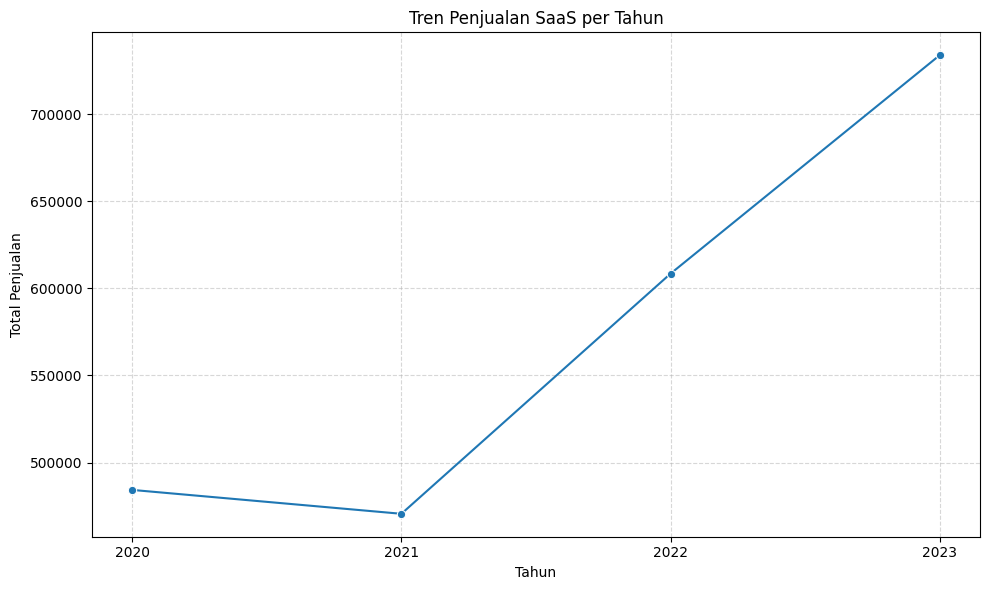

In [37]:

# Visualisasi tren total penjualan per tahun
plt.figure(figsize=(10, 6))
sales_per_year_df = df.groupby('Tahun')['Sales'].sum().reset_index()
sns.lineplot(data=sales_per_year_df, x='Tahun', y='Sales', marker='o')
plt.title('Tren Penjualan SaaS per Tahun')
plt.xticks(sales_per_year_df['Tahun']) # mengatur label pada sumbu x
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insight : 

Meskipun secara visual terlihat tren kenaikan penjualan SaaS dari tahun 2021 ke 2023, hasil uji statistik menunjukkan bahwa tidak terdapat perbedaan yang signifikan secara statistik antar tahun (p-value: 0.4981). Artinya, kenaikan tersebut belum cukup kuat secara statistik untuk menyimpulkan adanya tren musiman tahunan yang signifikan.



## Kesimpulan
1. Negara-negara dengan jumlah pelanggan terbanyak seperti **United States**, **United Kingdom**, dan **Japan** juga mencatatkan penjualan tertinggi secara global, memperkuat temuan bahwa **wilayah EMEA dan Americas—khususnya subregion NAMER—mendominasi kontribusi penjualan SaaS dunia**, dengan EMEA menyumbang 45.44% dan Americas 36.47% dari total penjualan.
2. Nilai korelasi 0.48 menunjukkan bahwa Terdapat hubungan positif sedang antara Sales dan Profit. Artinya, saat penjualan (Sales) meningkat, profit cenderung ikut naik, dan hubungan ini cukup konsisten, meskipun tidak terlalu kuat.
3. Terdapat perbedaan signifikan antara profit transaksi yang menggunakan diskon dan yang tidak (p-value < 0.001).
Transaksi tanpa diskon secara umum menghasilkan profit yang lebih tinggi, terlihat dari distribusi nilai profit yang lebih besar dan median yang lebih tinggi dibandingkan transaksi yang menggunakan diskon.
4. Segmen SMB mendominasi profit tertinggi di hampir semua industri, menunjukkan bahwa pasar UKM (Usaha Kecil dan Menengah) merupakan kontributor terbesar terhadap total profit. Industri dengan profit tertinggi secara keseluruhan adalah Energy - SMB ($23.971,63), Healthcare - SMB ($21.336,58), dan Finance - Strategic ($20.751,81). Hal ini menunjukkan bahwa sektor Energy, Healthcare, dan Finance memiliki daya beli tinggi serta potensi pasar yang besar di masing-masing segmennya.
5. Meskipun secara visual terlihat tren kenaikan penjualan SaaS dari tahun 2021 ke 2023, hasil uji statistik menunjukkan bahwa tidak terdapat perbedaan yang signifikan secara statistik antar tahun (p-value: 0.4981). Artinya, kenaikan tersebut belum cukup kuat secara statistik untuk menyimpulkan adanya tren musiman tahunan yang signifikan.

## Saran
1. Fokus pada Wilayah Dominan untuk Ekspansi Lebih Lanjut

    Dengan dominasi wilayah EMEA dan Americas, khususnya negara seperti United States, United Kingdom, dan Japan, perusahaan dapat memperkuat kehadirannya melalui peningkatan layanan, personalisasi strategi lokal, dan penetrasi lebih dalam di subregion seperti NAMER dan UKIR.

2. Optimalkan Strategi Penjualan untuk Memaksimalkan Profit

    Mengingat terdapat korelasi positif antara Sales dan Profit, penting bagi perusahaan untuk tidak hanya mendorong volume penjualan, tetapi juga memperhatikan efisiensi biaya dan margin dalam setiap transaksi guna menjaga profitabilitas.

3. Tinjau Kembali Kebijakan Diskon Secara Strategis

    Karena transaksi tanpa diskon cenderung menghasilkan profit yang lebih tinggi, pemberian diskon sebaiknya dilakukan secara selektif—misalnya hanya untuk segmen yang memiliki potensi jangka panjang atau retensi tinggi, bukan sebagai strategi umum.

4. Fokus pada Segmen SMB dan Industri Potensial

    Dominasi segmen SMB dalam profit tertinggi menunjukkan bahwa UKM merupakan pasar kunci. Oleh karena itu, strategi pemasaran dan pengembangan produk perlu disesuaikan dengan kebutuhan UKM di sektor Energy, Healthcare, dan Finance yang terbukti sangat menguntungkan.

5. Lakukan Monitoring Jangka Panjang terhadap Tren Penjualan

    Walaupun belum signifikan secara statistik, tren peningkatan penjualan dari tahun ke tahun tetap perlu dimonitor. Disarankan untuk melakukan evaluasi rutin dengan periode yang lebih panjang agar dapat mengidentifikasi pola musiman atau pertumbuhan tahunan yang lebih jelas.

